In [1]:
!pip install matplotlib
import pandas as pd
import pickle
from os import walk
import matplotlib.pyplot as plt
import numpy as np
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[1800, 300, 600, 900, 2100, 1200, 1500]
[0.27888078669678423, 0.25121497617908706, 0.2512132341395228, 0.26122506026040554, 0.29291678571208407, 0.27131579170249925, 0.26769231814489797]
[1000, 100, 1100, 1400, 1300, 1700, 1800, 200, 1600, 1500, 1200, 1900, 500, 600, 300, 400, 800, 900, 700]
[0.21490828165252937, 0.2532101007579361, 0.21463424911276754, 0.19745119788666143, 0.21200276881252053, 0.2307432395065777, 0.23425209133642586, 0.25677763681290133, 0.21824647511325965, 0.20442760070386054, 0.21305110449459475, 0.2370424404558285, 0.259634474997235, 0.2497688203420885, 0.24728963745117546, 0.2533670719291659, 0.24525749793745796, 0.23937887708604916, 0.24773813127763064]


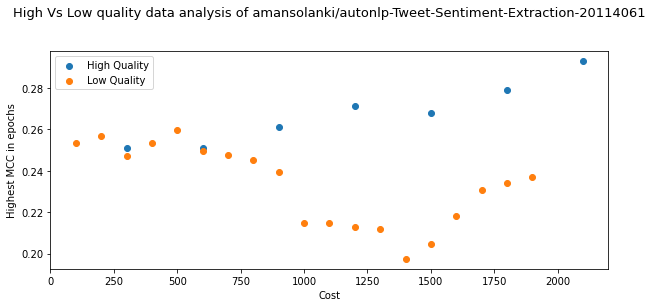

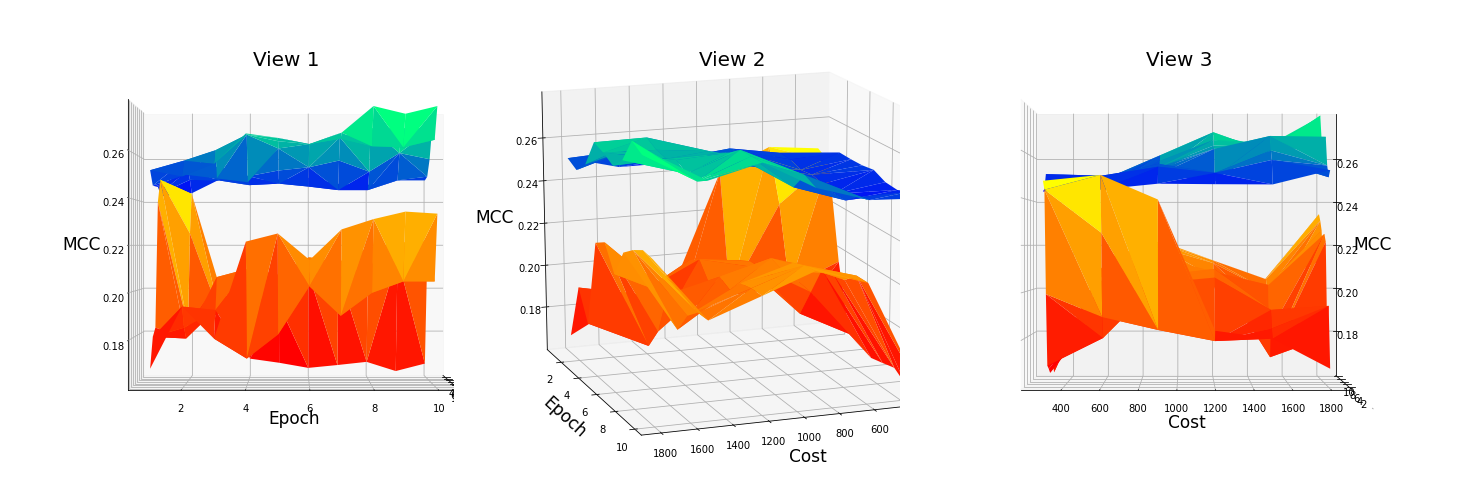

In [2]:


def extract_mcc(list_path):
  ld = pickle.load( open( list_path, "rb" ) )
  ld.pop()
  ld.pop()
  mcc = []
  for idx, x in enumerate(ld):
      if idx%2 == 1:
        #print(x)
        temp = x.get("eval_matthews_correlation")
        mcc.append(temp)
  return mcc




def extract_log_data(path,isHigh):
  ls = []
  for (dirpath, dirnames, filenames) in os.walk(path):
      break
  max = 0
  #print(filenames)
  for file_name in filenames:
    #print(file_name)
    
    file_path = dirpath +"/" + file_name
    #print(file_path)
    mcc = extract_mcc(file_path)
    if isHigh:
      num = file_name.replace("_highQuality.p","")
    else:
      num = file_name.replace("_lowQuality.p","")
    num = int(num)

    if num > max:
      max = num
    dict_ = {
    "name": file_name,
    "num_of_data":num,
    "list_of_mcc": mcc 
    }
    ls.append(dict_)
  return ls,max


def plot_highVsLow_best_epoch_graph(high_path,low_path,cost=3,title=None):
  high,high_max = extract_log_data(high_path,True)
  low,low_max = extract_log_data(low_path,False)


  x = []
  y =[]

  x_=[]
  y_=[]

  for dict_ in high:
    list_mcc = dict_['list_of_mcc']
    y.append(max(list_mcc))
    x_val = int( dict_['name'].replace("_highQuality.p","")  )
    x.append(x_val*cost)

  for dict_ in low:
    list_mcc = dict_['list_of_mcc']
    y_.append(max(list_mcc))
    x_val = int( dict_['name'].replace("_lowQuality.p","")  )
    x_.append(x_val)

  print(x)
  print(y)

  print(x_)
  print(y_)

  #plt.plot(x, y, label = "high")
  plt.figure(figsize=(10,4))
  plt.scatter(x,y,label = "High Quality")
  #plt.plot(x_, y_, label = "low")
  plt.scatter(x_,y_,label = "Low Quality")
  plt.xlabel("Cost")
  plt.ylabel("Highest MCC in epochs")
  plt.title(title,pad = 35,fontsize = 13)
  plt.legend()
  plt.show()


high_path_el = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/elozano_lowVsHigh_10/high"
low_path_el = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/elozano_lowVsHigh_10/low"

high_path_sva = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/sva_lowsVsHigh_10/high"
low_path_sva = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/sva_lowsVsHigh_10/low"

cost = 3


def plot3d_highVsLow(high_path,low_path,cost,fontsize,azim=70,elev=16,title=None,ax =None):
  high,high_max = extract_log_data(high_path,True)
  low,low_max = extract_log_data(low_path,False)

  if high_max*cost > low_max:
    max_ = low_max
  else:
    max_ = high_max*cost

  max_ = int(max_/100) / cost
  max_ = int(max_)

  X=[]
  Y = []
  Z = []

  X_=[]
  Y_ = []
  Z_ = []

  for dict_ in high:
    name = dict_['name']
    num_of_sample = int(name.replace("_highQuality.p",""))
    #print(num_of_sample)
    if num_of_sample <= max_*100:
      for idx,mcc in enumerate(dict_['list_of_mcc']):
          X.append(num_of_sample*cost)
          Y.append(idx+1)
          Z.append(mcc)
    
  for dict_ in low:
    name = dict_['name']
    num_of_sample = int(name.replace("_lowQuality.p",""))

    if num_of_sample <= (max_*100*cost) and num_of_sample%(100*cost) == 0:
      for idx,mcc in enumerate(dict_['list_of_mcc']):
        X_.append(num_of_sample)
        Y_.append(idx+1)
        Z_.append(mcc)

  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  from matplotlib import cm
  import numpy as np
  from sys import argv



  from matplotlib import pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  if ax == None:
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca(projection='3d')

  surf1 = ax.plot_trisurf(X, Y, Z, cmap='winter',label = "High")
  surf2 = ax.plot_trisurf(X_, Y_, Z_, cmap='autumn',label= "Low")
  ax.view_init(azim=azim, elev=elev)
  if plt.title != None:
    ax.set_title(title,pad = -20,fontsize =20)
  pad = 4
  #fontsize = 20
  ax.set_xlabel('Cost',fontsize = fontsize[0], labelpad=8)
  ax.set_ylabel('Epoch',fontsize = fontsize[1])#, labelpad=pad)
  ax.set_zlabel('MCC'  ,fontsize = fontsize[2], labelpad=15)
  #ax.legend()
  #ax.set_title("nf")
  if ax == None:
    fig.show()
  
  #plt.savefig('teste.pdf')
    plt.show()

def plot3Din3views(path,title = None,cost = 3):
  high_path = path + "/" + "high"
  low_path = path + "/" + "low"
  if title == None:
    title = os.path.basename(os.path.normpath(path))

  plot_highVsLow_best_epoch_graph(high_path,low_path,cost,title=title)
  fig, ax = plt.subplots(1,3,figsize=(26,9),subplot_kw=dict(projection='3d'))
  
  fig.subplots_adjust(wspace=-0.2, hspace=0)
  
  #
  #title = None
  fontsize_ = 17
  plot3d_highVsLow(high_path,low_path,cost,title="View 2",ax = ax[1],fontsize = [fontsize_,fontsize_,fontsize_])
  plot3d_highVsLow(high_path,low_path,cost,title="View 1",ax = ax[0],azim = 0,elev =0,fontsize = [0,fontsize_,fontsize_])
  plot3d_highVsLow(high_path,low_path,cost,azim =270,elev = 0,title="View 3",ax = ax[2],fontsize = [fontsize_,0,fontsize_])
  
  #fig.tight_layout()
  
  #plt.close()
  #

  

#plot3d_highVsLow(high_path_el,low_path_el,cost,0,0)
#plot3d_highVsLow(high_path_el,low_path_el,cost,270,0)
#plot3d_highVsLow(high_path_el,low_path_el,cost)

#print("break")

#plot3d_highVsLow(high_path_el,low_path_sva,cost,0,0)
#plot3d_highVsLow(high_path_el,low_path_sva,cost,270,0)
#plot3d_highVsLow(high_path_sva,low_path_sva,cost)

plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/aman","High Vs Low quality data analysis of amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061")


In [5]:
log_path = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/all models finetuned"
def recursive_files(dir_name, ignore=None):
    for dir_name,subdirs,files in os.walk(dir_name):
        if ignore and os.path.basename(dir_name) in ignore: 
            continue

        for file_name in files:
            if ignore and file_name in ignore:
                continue

            yield os.path.join(dir_name, file_name) 

for dir_name,subdirs,files in os.walk(log_path):
  break

print(files)
for file in files:
  print(file)

for sub in subdirs:
  print(sub)
  for file in files:
    print(file)
    if sub in file:
      if file.endswith("high/logs.p"):
        mcc_high = extract_mcc(file)
        x_high = [*range(len(mcc_high))]
      elif file.endswith("low/logs.p"):
        mcc_low = extract_mcc(file)
        x_low = [*range(len(mcc_low))]
      elif file.endswith("mixed/logs.p"):
        mcc_mixed = extract_mcc(file)
        x_mixed = [*range(len(mcc_mixed))]
      else:
        mcc_high_low = extract_mcc(file)
        x_high_low = [*range(len(mcc_high_low))]
  plt.plot(x_high,mcc_high,label = "high")
  plt.plot(x_low,mcc_low,label = "low")
  plt.plot(x_high_low,mcc_high_low,label = "high_low")
  plt.plot(x_mixed,mcc_mixed,label = "mixed")
  plt.xlabel("Epoch")
  plt.ylabel("MCC")
  plt.title(sub)
  plt.legend()
  plt.show()
  

for i in recursive_files(log_path):
  print(i)

print("end")
max_mcc = 0
best_model = "none"
num = 0
prev = "none"
for names in recursive_files(log_path):
  print(log_path)
  if names.endswith("high/logs.p"):
    prev = names
  elif names.endswith("/logs.p"):
    num = num + 1
    print(names)
    mcc = extract_mcc(prev)
    mcc2 = extract_mcc(names)
    print(mcc)
    mcc_max_pos =mcc.index(max(mcc)) + 1
    print("pos of max mcc in high ",mcc_max_pos) 
    print(mcc2)
    if max(mcc) > max(mcc2):
      print(max(mcc))
    else:
      print(max(mcc2))
    
    #print(len(mcc))
    if max_mcc < max(mcc):
      max_mcc = max(mcc)
      best_model = prev

    if max_mcc < max(mcc2):
      max_mcc = max(mcc2)
      best_model = names
    
    x = []
    x2 = []
    for i in range(len(mcc)):
      x.append(i+1)

    for i in range(len(mcc2)):
      x2.append(i+1 + mcc_max_pos )   
    y = mcc
    y2 = mcc2
    plt.plot(x,y,label = "high")
    plt.plot(x2,y2,label = "low")
    plt.xlabel("Epoch")
    plt.ylabel("MCC")
    plt.title(names)
    plt.legend()
    plt.show()
  
print("num total is " , num)
print("best model is " ,best_model , " with score mcc of ", max_mcc)

[]
amansolanki


NameError: ignored

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/cardif_bertweet","High Vs Low quality data analysis of cardiffnlp/bertweet-base-sentiment")

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/cardif_xlm_twitter","High Vs Low quality data analysis of cardiffnlp/twitter-xlm-roberta-base-sentiment")

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/elozano_lowVsHigh_10","High Vs Low quality data analysis of elozano/tweet_sentiment_eval")

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/finiteautomata","High Vs Low quality data analysis of finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vs_low/sva_lowsVsHigh_10","High Vs Low quality data analysis of svalabs/twitter-xlm-roberta-bitcoin-sentiment")

In [ ]:
plot3Din3views("/content/drive/MyDrive/fyp/fyp2/final models and datasets/High_vsw_low/tomas23","High Vs Low quality data analysis of Tomas23/twitter-roberta-base-mar2022-finetuned-sentiment")